In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,1.0,1,1.0,2.0,1.0,3.0,1.0,1.0
680,NaN,10.0,10,10.0,4.0,10.0,5.0,6.0,3.0
681,1.0,1.0,1,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	15
int64		column 3	0
float64		column 4	3
float64		column 5	6
float64		column 6	9
float64		column 7	6
float64		column 8	9
float64		column 9	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,680.000000,668.000000,683.000000,680.000000,677.000000,674.000000,677.000000,674.000000,680.000000
mean,4.438235,3.142216,3.215227,2.838235,3.218612,3.551929,3.453471,2.850148,1.605882
std,2.815747,3.050177,2.988581,2.868293,2.216681,3.641980,2.453649,3.036642,1.736033
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,3.750000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

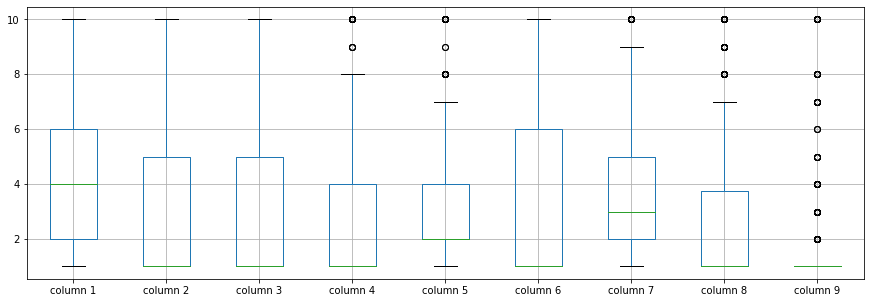

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.438235
column 2    3.142216
column 3    3.215227
column 4    2.838235
column 5    3.218612
column 6    3.551929
column 7    3.453471
column 8    2.850148
column 9    1.605882
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.648635,0.656105,0.491436,0.526270,0.595173,0.556947,0.536558,0.349459
column 2,0.648635,1.000000,0.906880,0.706810,0.751335,0.684641,0.753348,0.708651,0.460424
column 3,0.656105,0.906880,1.000000,0.685427,0.720861,0.709317,0.734262,0.713246,0.442142
column 4,0.491436,0.706810,0.685427,1.000000,0.588855,0.665247,0.666723,0.594239,0.417906
column 5,0.526270,0.751335,0.720861,0.588855,1.000000,0.581730,0.612390,0.620226,0.479634
column 6,0.595173,0.684641,0.709317,0.665247,0.581730,1.000000,0.675608,0.570133,0.328797
column 7,0.556947,0.753348,0.734262,0.666723,0.612390,0.675608,1.000000,0.657937,0.344043
column 8,0.536558,0.708651,0.713246,0.594239,0.620226,0.570133,0.657937,1.000000,0.436652
column 9,0.349459,0.460424,0.442142,0.417906,0.479634,0.328797,0.344043,0.436652,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+60,9+60+60,9+60+60,9+60+60+60+60,9+60+60+60+60+60,9+60+60+60+60+60+60,9+60+60+60+60+60,9+60+60+60+60,9+60+60+60,9+60+60,9+60,9], vae_layer = False, seed = 600)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.48401273999895
Epoch: 1 , loss: 36.39671116783505
Epoch: 2 , loss: 35.296289080665225
Epoch: 3 , loss: 33.38642978668213
Epoch: 4 , loss: 32.75485937935965
Epoch: 5 , loss: 32.335006804693315
Epoch: 6 , loss: 32.260940415518625
Epoch: 7 , loss: 32.169084140232634
Epoch: 8 , loss: 31.47559383937291
Epoch: 9 , loss: 31.144997006370907
Epoch: 10 , loss: 31.240328834170388
Epoch: 11 , loss: 30.23919764019194
Epoch: 12 , loss: 30.067747116088867
Epoch: 13 , loss: 29.45433705193656
Epoch: 14 , loss: 29.534037090483167
Epoch: 15 , loss: 29.625336987631663
Epoch: 16 , loss: 29.25722617194766
Epoch: 17 , loss: 29.387647356305802
Epoch: 18 , loss: 28.349646522885276
Epoch: 19 , loss: 29.027337255932036
Epoch: 20 , loss: 28.876309848967054
Epoch: 21 , loss: 28.51424235389346
Epoch: 22 , loss: 28.181143170311337
Epoch: 23 , loss: 27.597577322097052
Epoch: 24 , loss: 27.611599944886706
Epoch: 25 , loss: 28.237183

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
679,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
680,-0.122216,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
681,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.076410267021007, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.06583523376619735

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.0,1,1.0,2.0,1.0,3.0,1.0,1.0
1,5.000000,4.0,4,5.0,7.0,10.0,3.0,2.0,1.0
2,3.000000,1.0,1,1.0,2.0,2.0,3.0,1.0,1.0
3,6.000000,8.0,8,1.0,3.0,4.0,3.0,7.0,1.0
4,4.000000,1.0,1,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.0,1,1.0,2.0,1.0,2.0,1.0,1.0
679,2.000000,1.0,1,1.0,2.0,1.0,3.0,1.0,1.0
680,4.877784,10.0,10,10.0,4.0,10.0,5.0,6.0,3.0
681,1.000000,1.0,1,3.0,2.0,1.0,1.0,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_NE_1(imp).xlsx", index=False, header=False)